# **Willkommen zur interaktiven Übung zum Thema "Advektions-Dispersions-Gleichung"**

**Sebastian Gnann**


Bei Fragen und Feedback wenden Sie sich bitte an: sebastian.gnann@hydrologie.uni-freiburg.de

---

Diese Online-Übung basiert auf einem sogenannten Jupyter Notebook (https://jupyter.org/). 
Ein Notebook besteht aus einzelnen Zellen, die entweder Markdown-Text oder Python-Code beinhalten.

Bitte führen Sie das gesamte Notebook von Anfang an aus, damit alle Python-Module und die Daten in der richtigen Reihenfolge geladen werden.
Klicken Sie zunächst auf das Symbol "Restart the kernel". Dann können Sie jeden Abschnitt einzeln ausführen, indem Sie auf die entsprechende Zelle und dann auf das Symbol "Run the selected cell and advance" klicken (alternativ: Shift + Enter drücken). 
Sie können auch auf "Restart the kernel and run all cells" klicken, um das gesamte Notebook auszuführen. Dies sollte sicherstellen, dass alles in der richtigen Reihenfolge ausgeführt wird.

Nun können Sie sich Stück für Stück durch die Text- und Codezellen arbeiten. 

Sollten Sie länger inaktiv sein, kann es vorkommen, dass das Notebook nicht mehr richtig läuft (z.B. Nachricht "Kernel died unexpectedly"). Starten Sie in diesem Fall das Notebook einfach neu, am besten mit "Restart the kernel and run all cells". Sie können dann direkt zu dem Punkt zurückkehren, an dem Sie sich befanden, und müssen sich nicht erneut durch alle Zellen klicken. Sollte das Notebook gar nicht mehr laufen, dann laden Sie bitte den gesamten Link erneut.

Auf der linken Seite können Sie sich auch ein Inhaltsverzeichnis anzeigen lassen, indem Sie auf "Table of Contents" klicken. Das hilft beim Navigieren.

## Inhalt
### **Struktur der Übung**
- Einleitung und Lösungen der 1D/2D Advektions-Dispersions-Gleichung
- Verhalten der 1D/2D Advektions-Dispersions-Gleichung
- Anwendungsbeispiel mit echten Daten

<span style="color:DarkRed">
    
### **Lernziele**
Sie sollten verstehen:
- wie die Lösungen der 1D/2D Advektions-Dispersions-Gleichung in Raum und Zeit aussehen
- wie die verschiedenen Parameter die räumliche und zeitliche Ausbreitung einer Schadstoffwolke beeinflussen
- wie man die Lösungen nutzen kann, um mit gemessenen Durchbruchskurven Eigenschaften eines Systems abzuleiten (z.B. Aquifer) 

</span>

## Notwendige Python Packages
Es gibt verschieden sogenannte Packages für Python, die bestimme Funktionen ausführen. 
Manche Packages helfen beim Erstellen von Grafiken, andere erledigen bestimmte Rechenaufgaben (z.B. statistische Tests).
Diese müssen am Anfang importiert werden. Wird das nicht gemacht, kann der nachstehende Code nicht ausgeführt werden.

In [1]:
# import all necessary Python packages
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import imageio.v2 as imageio
import numpy as np
import pandas as pd
from scipy import special    
import ipywidgets as widgets

# Einleitung und Lösungen der Advektions-Dispersions-Gleichung


## Parameter und Variablen:
- $C$ [mg/L] = Konzentration (volumen-gewichtet)
- $C_F$ [mg/L] = durchfluss-gewichtete Konzentration
- $t$ [s] = Zeit
- $x$ [m] = Ausdehnung in x-Richtung (1D)
- $y$ [m] = Ausdehnung in y-Richtung 
- $D_L$ [m/s²] = longitudinaler Dispersionskoeffizient
- $D_T$ [m/s²] = transversaler Dispersionskoeffizient
- $v$ [m/s] = Transportgeschwindigkeit
- $M$ [mg] = Masse des Schadstoffs
- $Q$ [m³/s] = Durchfluss
- $A$ [m²] = Fläche (Aquiferquerschnitt)
- $H$ [m] = Mächtigkeit
- $n$ [-] = effektive Porosität

## Die Advektions-Dispersions-Gleichung

Für die Ausbreitung und Vermischung von konservativen Stoffen im Grundwasser sind drei verschiedene Prozesse wesentlich: Advektion, Diffusion und Dispersion.
Im folgenden fassen wir die Dispersion und die (meist deutlich kleinere) Diffusion zusammen. 
Verbindet man die verschiedenen Stoffflüsse mit der Massenerhaltung, ergibt sich die 1D Advektions-Dispersions-Gleichung (z.B. Fetter et al., 1999):
$$ D_L {\partial^2 C \over \partial x^2} - v {\partial C \over \partial x} = {\partial C \over \partial t}$$

Betrachtet man zwei Dimensionen kommt noch ein transversaler Dispersionsterm hinzu:
$$ D_L {\partial^2 C \over \partial x^2} + D_T {\partial^2 C \over \partial x^2} - v {\partial C \over \partial x} = {\partial C \over \partial t}$$

## Lösungen der Advektions-Dispersions-Gleichung

Es gibt nun verschiedene analytische Lösungen für verschiedene Anfangs- und Randbedingungen.
Die Lösung der 1D Advektions-Dispersions-Gleichung für einen Pulseintrag der Masse $M$ in die Fläche $A$ ist (z.B. Bear, 1972):

$$ C(x,t) = {M \over nA} {1 \over \sqrt{4 \pi D_L t}} \exp{\left[ - (x-v t)^2 \over 4 D_L t \right]} $$


Die Lösung der 1D Advektions-Dispersions-Gleichung für einen kontinuierlichen Eintrag mit der Konzentration $C_0$ ist (z.B. Fetter et al., 1999):

$$ C(x,t) = {C_0 \over 2} \text{erfc}{\left[ x-v t \over \sqrt{4 D_L t} \right]} $$


Die Lösung der 2D Advektions-Dispersions-Gleichung für einen Pulseintrag ist (z.B. Bear, 1972):

$$ C(x,t) = {M \over nH} {1 \over 4 \pi t \sqrt{D_L D_T}} \exp{\left[ {- (x-v t)^2 \over 4 D_L t} - {y^2 \over 4 D_T t} \right]} $$


Außerdem gibt es noch Lösungen für die durchfluss-gewichtete Konzentration, die Anwendung finden, wenn die Konzentration im Durchfluss gemessen wird (z.B. Tracer-Pumpversuch, siehe Leibundgut et al., 2009).
Die Lösung der 1D Advektions-Dispersions-Gleichung für einen Pulseintrag bei Durchfluss $Q$ ist:

$$ C_F(x,t) = {M \over Q} {x \over \sqrt{4 \pi D_L t^3}} \exp{\left[ - (x-v t)^2 \over 4 D_L t \right]} $$

## Quellen

Bear, J. (1972). Dynamics of fluids in porous media. Courier Corporation.

Fetter, C. W., Boving, T. B., & Kreamer, D. K. (1999). Contaminant hydrogeology (Vol. 1138). Upper Saddle River, NJ: Prentice hall.

Leibundgut, C., Maloszewski, P., & Külls, C. (2009). Tracers in hydrology (p. 432). Chichester: Wiley-Blackwell.

In [2]:
def one_d_transport_equation_pulse(t, x, M, A, D_L, v):
    # 1d advection dispersion equation for a pulse like injection
    C = M/A * (1/np.sqrt(4*np.pi*D_L*t)) * np.exp(-(x-v*t)**2/(4*D_L*t))
    return C

def one_d_transport_equation_continuous(t, x, C_0, D_L, v):    
    # 1d advection dispersion equation for a continuous injection
    C = (C_0/2) * special.erfc((x - v*t)/(np.sqrt(4*D_L*t)))
    return C

def two_d_transport_equation_pulse(t, x, y, M, n, H, D_L, D_T, v):
    # 1d advection dispersion equation for a pulse like injection
    C = M/(n*H) * (1/(4*np.pi*t*np.sqrt(D_L*D_T))) * np.exp(-(x-v*t)**2/(4*D_L*t)-y**2/(4*D_T*t))
    return C

def one_d_transport_equation_pulse_flux(t, x, M, Q, D_L, v):
    # 1d advection dispersion equation for a pulse like injection (flux-weighted concentration)
    C = M/Q * (x/np.sqrt(4*np.pi*D_L*t**3)) * np.exp(-(x-v*t)**2/(4*D_L*t))
    return C

# Verhalten der 1D Advektions-Dispersions-Gleichung

Im folgenden wird die Advektions-Dispersions-Gleichung für verschiedene Parameterwerte gelöst. Man kann die Lösung entweder im Raum oder in der Zeit betrachten, um das Ausbreiten eines Stoffes zu veranschaulichen.

<span style="color:Indigo">**Frage**: *Wieso ist die Durchbruchskurve (zeitliche Entwicklung, rechte Grafik) asymmetrisch und die räumliche Verteilung nicht (linke Grafik)?*</span>


In [16]:
def f(D_L,v):
    
    # fixed parameters
    A = 1000 # [l/m]
    M = 1000 # [mg]
    
    # plot results
    fig, axes = plt.subplots(figsize=(12, 3), constrained_layout=True, nrows=1, ncols=2, gridspec_kw={'width_ratios': [2, 2]})
    
    # solve transport equation in space for a few times
    x = np.linspace(0, 500, 1001) 
    #axes[0].step(x, one_d_transport_equation_pulse(1, x, M, A, D_L, v), '-', c='grey', label='t=1')
    axes[0].plot(x, one_d_transport_equation_pulse(20, x, M, A, D_L, v), '-', c='darkred', label='t=20')
    axes[0].plot(x, one_d_transport_equation_pulse(50, x, M, A, D_L, v), '-', c='orangered', label='t=50')
    axes[0].plot(x, one_d_transport_equation_pulse(80, x, M, A, D_L, v), '-', c='lightsalmon', label='t=80')
    axes[0].set_xlabel('Abstand [m]')
    axes[0].set_ylabel('Konzentration [mg/L]')
    axes[0].legend(loc='upper right')

    # solve transport equation in time for a few locations
    t = np.linspace(1, 251, 1001)
    #ax.step(x, one_d_transport_equation_pulse(t, 1, M, A, D_L, v), '-', c='grey', label='x=1')
    axes[1].plot(t, one_d_transport_equation_pulse(t, 25, M, A, D_L, v), '-', c='midnightblue', label='x=25')
    axes[1].plot(t, one_d_transport_equation_pulse(t, 50, M, A, D_L, v), '-', c='slateblue', label='x=50')
    axes[1].plot(t, one_d_transport_equation_pulse(t, 100, M, A, D_L, v), '-', c='lightsteelblue', label='x=100')
    axes[1].set_xlabel('Zeit [s]')
    axes[1].set_ylabel('Konzentration [mg/L]')
    axes[1].legend(loc='upper right')

widgets.interact(f, D_L=(0.01,39.99,0.01), v=(0.01,3.99,0.01))

%matplotlib inline

interactive(children=(FloatSlider(value=20.000000000000004, description='D_L', max=39.99, min=0.01, step=0.01)…

## Lösung für einen kontinuierlichen Stoffeintrag
Ist der Stoffeintrag kontinuerlich, so ergibt sich eine andere Lösung. Bei $x$=0 bleibt die Konzentration konstant und die Schadstofffahne breitet sich von dort aus immer weiter aus.

<span style="color:Indigo">**Frage**: *Welchem Wert nähert sich die Konzentration für späte Zeiten $t$ an?*</span>


In [17]:
def f(D_L,v):
    
    # fixed parameters
    C_0 = 100 # [mg]
    
    # plot results
    fig, axes = plt.subplots(figsize=(12, 3), constrained_layout=True, nrows=1, ncols=2, gridspec_kw={'width_ratios': [2, 2]})
    
    # solve transport equation in space for a few times
    x = np.linspace(0, 500, 1001)
    #axes[0].step(x, one_d_transport_equation_continuous(1, x, C_0, D_L, v), '-', c='grey', label='t=1')
    axes[0].plot(x, one_d_transport_equation_continuous(20, x, C_0, D_L, v), '-', c='darkred', label='t=20')
    axes[0].plot(x, one_d_transport_equation_continuous(50, x, C_0, D_L, v), '-', c='orangered', label='t=50')
    axes[0].plot(x, one_d_transport_equation_continuous(80, x, C_0, D_L, v), '-', c='lightsalmon', label='t=80')
    axes[0].set_xlabel('Abstand [m]')
    axes[0].set_ylabel('Konzentration [mg/L]')
    axes[0].legend(loc='upper right')

    # solve transport equation in time for a few locations
    t = np.linspace(1, 251, 1001)    
    #ax.step(x, one_d_transport_equation_continuous(t, 1, C_0, D_L, v), '-', c='grey', label='x=1')
    axes[1].plot(t, one_d_transport_equation_continuous(t, 25, C_0, D_L, v), '-', c='midnightblue', label='x=25')
    axes[1].plot(t, one_d_transport_equation_continuous(t, 50, C_0, D_L, v), '-', c='slateblue', label='x=50')
    axes[1].plot(t, one_d_transport_equation_continuous(t, 100, C_0, D_L, v), '-', c='lightsteelblue', label='x=100')
    axes[1].set_xlabel('Zeit [s]')
    axes[1].set_ylabel('Konzentration [mg/L]')
    axes[1].legend(loc='upper right')

widgets.interact(f, D_L=(0.01,39.99,0.01), v=(0.01,3.99,0.01))

%matplotlib inline

interactive(children=(FloatSlider(value=20.000000000000004, description='D_L', max=39.99, min=0.01, step=0.01)…

## Einfluss der Parameter auf die Transportgleichung

Man kann nun auch die Parameter der Gleichung variieren (z.B. den Dispersionskoeffizienten oder die mittlere Fließgeschwindigkeit), um zu schauen wie sich die Lösung am selben Ort bzw. zur selben Zeit verändert (dies entspricht einer einfachen Sensitivitätsanalyse). 

<span style="color:Indigo">**Frage**: *Was passiert mit der Durchbruchskurve (rechts) bzw. der räumlichen Verteilung (links), wenn der Dispersionskoeffizient $D_L$ erhöht wird? Und was, wenn die mittlere Geschwindigkeit $v$ verringert wird?*</span>


In [5]:
# show base case and change in both space and time 
def f(D_L,v):
    
    # fixed parameters
    A = 1000 # [L/m]
    M = 1000 # [mg]

    # variable parameters
    D_L_default = 20.0 #1.5 # [m²/s]
    v_default = 2.0 # [m/s]

    # time and space variables
    x = np.linspace(0, 250, 1001)
    x_fix = 50
    t = np.linspace(1, 126, 1001)
    t_fix = 50

    # plot results
    fig, axes = plt.subplots(figsize=(12, 3), constrained_layout=True, nrows=1, ncols=2, gridspec_kw={'width_ratios': [2, 2]})
    
    axes[0].axvline(x = x_fix, color = 'lightgrey')
    axes[0].plot(x, one_d_transport_equation_pulse(t_fix, x, M, A, D_L_default, v_default), '-', c='grey', label='D_L = 20.0; v = 2.0')
    axes[0].plot(x, one_d_transport_equation_pulse(t_fix, x, M, A, D_L, v), '-', c='tab:blue', label='D_L = ' + str(np.round(D_L,2)) + '; v = ' + str(np.round(v,2)))
    axes[0].set_title('Zeit = ' + str(t_fix) + 's')
    axes[0].set_xlabel('Abstand [m]')
    axes[0].set_ylabel('Konzentration [mg/L]')
    axes[0].legend(loc='upper right')

    axes[1].axvline(x = t_fix, color = 'lightgrey')  
    axes[1].plot(t, one_d_transport_equation_pulse(t, x_fix, M, A, D_L_default, v_default), '-', c='grey', label='D_L = 20.0; v = 2.0')
    axes[1].plot(t, one_d_transport_equation_pulse(t, x_fix, M, A, D_L, v), '-', c='tab:blue', label='D_L = ' + str(np.round(D_L,2)) + '; v = ' + str(np.round(v,2)))
    axes[1].set_title('Abstand = ' + str(x_fix) + 'm')
    axes[1].set_xlabel('Zeit [s]')
    axes[1].set_ylabel('Konzentration [mg/L]')
    axes[1].legend(loc='upper right')

widgets.interact(f, D_L=(0.01,39.99,0.01), v=(0.01,3.99,0.01))

%matplotlib inline

interactive(children=(FloatSlider(value=20.000000000000004, description='D_L', max=39.99, min=0.01, step=0.01)…

# Lösung der 2D Advektions-Dispersions-Gleichung
Im folgenden wird die 2D Advektions-Dispersions-Gleichung gelöst. Mithilfe des Reglers können Sie den zeitlichen Verlauf nachverfolgen. 

<span style="color:Indigo">**Frage**: *Die Schadstoffwolke bewegt sich mit mittlerer Geschwindigkeit $v$ und verschmiert sowohl in $x$- als auch $y$-Richtung. In welche Richtung ist die "Verschmierung", d.h. die Dispersion, stärker?*</span>

In [6]:
def f(t):
    
    # fixed parameters
    M = 1000 # [mg]
    n = 0.25 # [-]
    H = 10 # [m]
    D_L = 1 # [m²/s]
    D_T = D_L*0.1 # [m²/s]
    v = 1.0 # [m/s]

    # time and space variables
    x = np.linspace(0, 500, 1001)
    y = np.linspace(-70, 70, 1001)
    X, Y = np.meshgrid(x, y)
    #t = np.linspace(1, 126, 1001)
    
    # plot results
    fig = plt.figure(figsize=(10,10))    
    ax = fig.add_subplot(111, projection='3d')   
    ax.set_box_aspect(aspect = (2,1,1))
    p = ax.plot_surface(X, Y, two_d_transport_equation_pulse(t, X, Y, M, n, H, D_L, D_T, v), cmap='viridis')  
    ax.set_zlim(0, 1) 
    ax.set_xlabel('x [m]')
    ax.set_ylabel('y [m]')
    ax.set_zlabel('C [mg/L]')
    ax.zaxis.labelpad = -1
    
widgets.interact(f, t=widgets.IntSlider(min=10, max=500, step=10, value=100))

%matplotlib inline

# make animated gif file
def make_gif():
    # generate the individual frames for different time points
    frames = []
    for t in np.arange(10,500,10):  # replace 10 with the desired time range
        f(t)  # call the function to plot at time t
        plt.savefig('./figures/tmp/frame_{}.png'.format(t))  # save the frame as an image
        frames.append(imageio.imread('./figures/tmp/frame_{}.png'.format(t)))  # add the frame to the list
        plt.close()  # clear the plot

    # combine the individual frames into a GIF
    imageio.mimsave('./figures/animation.gif', frames)
    
#make_gif()

interactive(children=(IntSlider(value=100, description='t', max=500, min=10, step=10), Output()), _dom_classes…

# Anwendungsbeispiel mit echten Daten

Wir laden nun echte Messdaten aus einem Säulenversuch im Labor und versuchen die Parameterwerte zu finden, die das System am besten beschreiben. 

In [7]:
C = pd.read_csv("Messdaten_Konzentration.csv", sep=',') # load data
C.head() # show the first 5 data points

,Zeit [s],Konzentration [mug/l]
0,500,0.000000
1,550,0.000000
2,660,2.043166
3,690,5.468405
4,720,7.790109


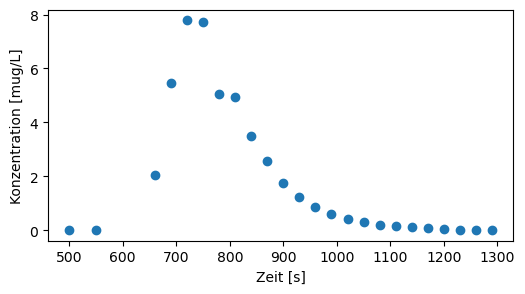

In [8]:
# plot data
fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(C["Zeit [s]"], C["Konzentration [mug/l]"], 'o', c='tab:blue')
plt.xlabel('Zeit [s]')
plt.ylabel('Konzentration [mug/L]')
%matplotlib inline

## Kalibrierung der Kurve
Sie können nun die Regler nutzen, um die Parameterwerte zu ändern und dadurch die theoretische Kurve and die Messdaten anpassen (Eichung bzw. Kalibrierung).

<span style="color:Indigo">**Frage**: *Für welche Werte von $D_T$ und $v$ passt die theoretische Lösung am besten mit den gemessenen Werten zusammen?*</span>

In [9]:
def f(D_L, v):
    
    # fixed parameters
    Q = 617 # [l/s]
    M = 1000000 # [µg]
    x = 450 # [m]
    
    # solve transport equation
    C_calc = one_d_transport_equation_pulse_flux(C["Zeit [s]"], x, M, Q, D_L, v)
    
    # plot results
    fig, ax = plt.subplots(figsize=(6, 3))
    ax.plot(C["Zeit [s]"], C["Konzentration [mug/l]"], 'o', c='tab:blue', label='Gemessen')
    ax.plot(C["Zeit [s]"], C_calc, '-', c='tab:orange', label='Berechnet')
    ax.set_xlim([0, 1500])
    plt.xlabel('Zeit [s]')
    plt.ylabel('Konzentration [mug/L]')
    plt.legend()

widgets.interact(f, D_L=(0.1,10.0), v=(0.1,2.0))

%matplotlib inline

interactive(children=(FloatSlider(value=5.05, description='D_L', max=10.0, min=0.1), FloatSlider(value=1.05, d…

## Automatische Kalibrierung
Das manuelle Anpassen der Kurve ist in diesem Fall recht einfach, wird bei komplizierteren Problemen aber schnell sehr zeitaufwändig.
Der folgende Code-Block findet automatisch geeignete Parameterwerte indem er eine sogenannte Zielfunktion minimiert.

<span style="color:Indigo">**Zusatzfrage**: *Der unten stehende Code findet automatisch die optimalen Werte. Wie kann man in einfachen Worten beschreiben, was der Code tut?*</span>

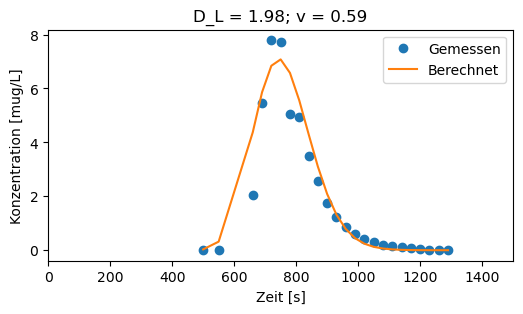

In [10]:
def rmse(params):
    
    # extract parameters
    D_L = params[0]
    v = params[1]
    
    # fixed parameters
    Q = 617 # [l/s]
    M = 1000000 # [µg]
    x = 450 # [m]
    
    # solve transport equation
    C_calc = one_d_transport_equation_pulse_flux(C["Zeit [s]"], x, M, Q, D_L, v)
    
    # calculate root mean squared error (rmse)    
    rmse = np.sqrt(np.mean((C_calc-C["Konzentration [mug/l]"])**2))
        
    return rmse

# optimize parameters
from scipy import optimize
bounds = [(0.01, 10.0), (0.01, 2.0)] # 
result = optimize.dual_annealing(rmse, bounds, maxiter=100)
optimized_variables = result.x

# fixed parameters
Q = 617 # [l/s]
M = 1000000 # [µg]
x = 450 # [m]
    
# solve transport equation
C_calc = one_d_transport_equation_pulse_flux(C["Zeit [s]"], x, M, Q, optimized_variables[0], optimized_variables[1])
    
# plot results
fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(C["Zeit [s]"], C["Konzentration [mug/l]"], 'o', c='tab:blue', label='Gemessen')
ax.plot(C["Zeit [s]"], C_calc, '-', c='tab:orange', label='Berechnet')
ax.set_xlim([0, 1500])
plt.xlabel('Zeit [s]')
plt.ylabel('Konzentration [mug/L]')
plt.title('D_L = ' + str(np.round(optimized_variables[0],2)) + '; v = ' + str(np.round(optimized_variables[1],2)))
plt.legend()

%matplotlib inline